In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")
import statsmodels.api as sm

In [19]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
X=train.iloc[:,2:]
X.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
y=train["Survived"]

In [23]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [24]:
X.shape

(891, 10)

In [91]:
title=X["Name"].str.replace(r'[\sa-zA-Z\'-]+,','')

In [99]:
X["Title"]=title.str.replace(r'\.[a-zA-Z\s\(\)\"\"\/]+','')
train["Title"]=X["Title"]

In [100]:
X.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [101]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


x -0.4
width 0.4
x 0.6000000000000001
width 0.4
x -2.7755575615628914e-17
width 0.4000000000000001
x 0.9999999999999999
width 0.4000000000000001


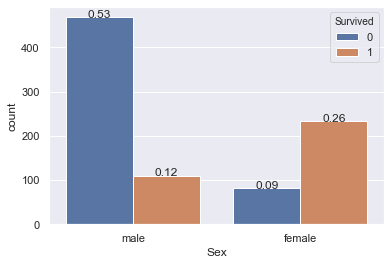

In [102]:
total=len(X)
ax=sns.countplot("Sex",data=train,hue="Survived")
for p in ax.patches:
    height = p.get_height()
    print("x",p.get_x())
    print("width",p.get_width())
    ax.text(p.get_x()+p.get_width()/2,
            height,
            '{:.2f}'.format(height/total),
            ha="center")

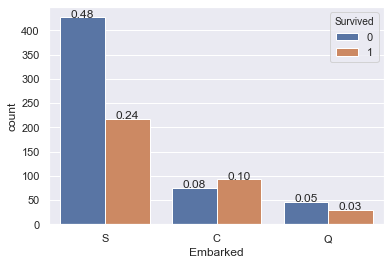

In [106]:
ax1=sns.countplot(x="Embarked",data=train,hue="Survived")
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2,
            height,
            '{:.2f}'.format(height/total),
            ha="center")

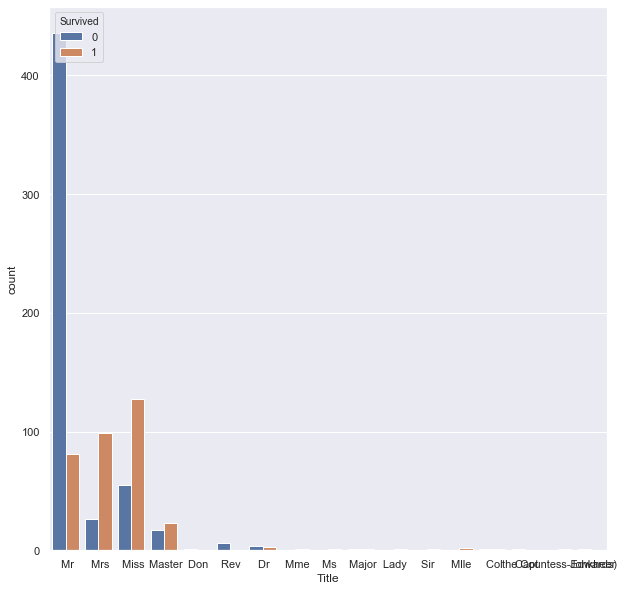

In [104]:
plt.figure(figsize=(10,10))
ax2=sns.countplot(x="Title",data=train,hue="Survived")
# for p in ax2.patches:
#     height = p.get_height()
#     ax2.text(p.get_x()+p.get_width()/2,
#             height,
#             '{:.2f}'.format(height/total),
#             ha="center")

In [105]:
X["Title"].value_counts()

 Mr                       517
 Miss                     182
 Mrs                      125
 Master                    40
 Dr                         7
 Rev                        6
 Col                        2
 Major                      2
 Mlle                       2
 Ms                         1
 Capt                       1
 Jonkheer                   1
 Sir                        1
 the Countess-Edwards)      1
 Mme                        1
 Don                        1
 Lady                       1
Name: Title, dtype: int64